# Test Setup

The clock distribution board is powered by 10V and the optoisolator breadboard is powered by 5V using isolated power supplies. The oscilloscope channels are connected as follows.
1. YELLOW: Phase-0, with optoisolator
2. CYAN: Phase-90, with optoisolator
3. PINK: Phase-180, direct connection
4. BLUE: Phase-270, direct connection

<img src="test_setup.JPG">

Note that Phase-0/Phase-180 and Phase-90/Phase-270 appear to be in-phase because the optoisolator breadboard includes an inverter stage. The circuit implemented on the optoisolator breadboard is the same as the LTSpice simulation (screenshot below).

<img src="breadboard_schematic.png">

# Test Results

The channel-to-channel clock skew is much better than expected. The Phase-0 and Phase-90 signals travel through entirely separate signal paths (inverters, flip-flops, optoisolators) and arrive with only 1deg of phase difference. This is equivalent to about 10ns!

In [1]:
from rigol_ds1000z import Rigol_DS1000Z, find_visa, process_display, process_waveform
import matplotlib.pyplot as plt

In [2]:
oscope = Rigol_DS1000Z(find_visa()).open()

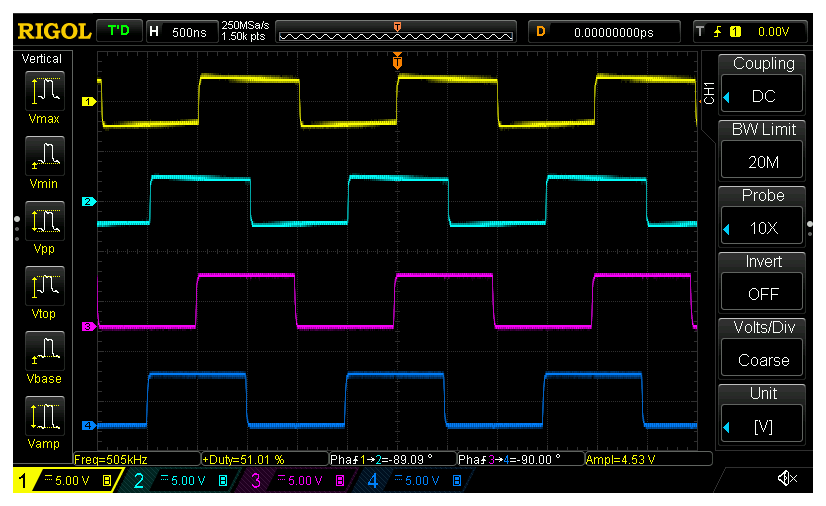

In [3]:
process_display(oscope.display(), show=True, filename="isolated_versus_nonisolated.png")

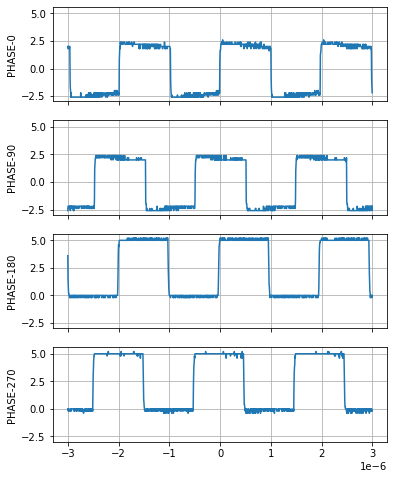

In [4]:
names = ["PHASE-" + s for s in ("0", "90", "180", "270")]
plt.subplots(4, 1, sharex=True, sharey=True, figsize=(6, 8))
for n in range(1, 5):
    filename = "isolated_versus_nonisolated_ch{:d}.csv".format(n)
    xdata, ydata = process_waveform(oscope.waveform(source=n), filename=filename)
    plt.subplot(4, 1, n)
    plt.plot(xdata, ydata)
    plt.grid()
    plt.ylabel(names[n - 1])

In [5]:
oscope.close()